# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [288]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt     
#date = dt.date.today
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [289]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [290]:
# API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_response = (requests.get(url + '&q=' + city)).json()
pprint(city_response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -42.78, 'lon': 147.06},
 'dt': 1573863208,
 'id': 2155415,
 'main': {'humidity': 37,
          'pressure': 1006,
          'temp': 53.91,
          'temp_max': 55.99,
          'temp_min': 51.01},
 'name': 'New Norfolk',
 'sys': {'country': 'AU',
         'id': 9545,
         'sunrise': 1573843144,
         'sunset': 1573895637,
         'type': 1},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09d',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 310, 'gust': 38.03, 'speed': 26.4}}


In [291]:
# set up lists to hold reponse infodata = []
search_record = []
city_list = []
lat = []
lon = []
temp = []
hum = []
wind = []
cloud = []
country = []
date = []
max_temp = []

count = 1

print("Beginning Data Retrieval ")
print("-------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        city_response = (requests.get(url + '&q=' + city)).json()
        city_list.append(city_response['name'])
        lat.append(city_response['coord']['lat'])
        lon.append(city_response['coord']['lon'])
        temp.append(city_response['main']['temp'])
        hum.append(city_response['main']['humidity'])
        wind.append(city_response['wind']['speed'])
        cloud.append(city_response['clouds']['all'])
        country.append(city_response['sys'] ['country'])
        date.append(city_response['dt'])
        max_temp.append(city_response['main']['temp_max'])
        search_record.append(city_response)
        print(f'Processing Record {count} of {len(cities)} | {city}')
        count = count + 1
    
    except KeyError:
        print(f'City not found. Skipping... {city}')
              
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')


Beginning Data Retrieval 
-------------------------------
Processing Record 1 of 611 | kondoa
Processing Record 2 of 611 | port elizabeth
Processing Record 3 of 611 | champerico
Processing Record 4 of 611 | souillac
Processing Record 5 of 611 | bluff
Processing Record 6 of 611 | salalah
Processing Record 7 of 611 | namwala
Processing Record 8 of 611 | nyimba
Processing Record 9 of 611 | ocala
Processing Record 10 of 611 | busselton
Processing Record 11 of 611 | abha
Processing Record 12 of 611 | aden
Processing Record 13 of 611 | flinders
Processing Record 14 of 611 | hermanus
Processing Record 15 of 611 | thompson
Processing Record 16 of 611 | jamestown
Processing Record 17 of 611 | carnarvon
Processing Record 18 of 611 | barrow
Processing Record 19 of 611 | rikitea
Processing Record 20 of 611 | jian
Processing Record 21 of 611 | torbay
Processing Record 22 of 611 | saint george
Processing Record 23 of 611 | plouzane
Processing Record 24 of 611 | ushuaia
Processing Record 25 of 611 | 

Processing Record 190 of 611 | luderitz
Processing Record 191 of 611 | crucea
City not found. Skipping... satitoa
Processing Record 192 of 611 | puerto ayora
Processing Record 193 of 611 | fairbanks
Processing Record 194 of 611 | ribeira grande
Processing Record 195 of 611 | kahului
Processing Record 196 of 611 | opuwo
City not found. Skipping... kismayo
Processing Record 197 of 611 | kangaba
Processing Record 198 of 611 | rio gallegos
Processing Record 199 of 611 | nikolskoye
Processing Record 200 of 611 | koumac
Processing Record 201 of 611 | esperance
Processing Record 202 of 611 | dong xoai
Processing Record 203 of 611 | acari
Processing Record 204 of 611 | quelimane
Processing Record 205 of 611 | grand gaube
Processing Record 206 of 611 | kangaatsiaq
Processing Record 207 of 611 | yenagoa
Processing Record 208 of 611 | victoria
Processing Record 209 of 611 | awjilah
Processing Record 210 of 611 | jalu
Processing Record 211 of 611 | ulladulla
City not found. Skipping... warqla
Proc

Processing Record 367 of 611 | kichera
Processing Record 368 of 611 | meulaboh
Processing Record 369 of 611 | bahia blanca
Processing Record 370 of 611 | royan
Processing Record 371 of 611 | prince rupert
Processing Record 372 of 611 | nehe
Processing Record 373 of 611 | nanakuli
Processing Record 374 of 611 | nabire
Processing Record 375 of 611 | aklavik
Processing Record 376 of 611 | turukhansk
Processing Record 377 of 611 | sao jose da coroa grande
Processing Record 378 of 611 | kishtwar
Processing Record 379 of 611 | mandali
Processing Record 380 of 611 | saint-pierre
Processing Record 381 of 611 | shorapani
Processing Record 382 of 611 | fortuna
Processing Record 383 of 611 | dalbandin
Processing Record 384 of 611 | pacific grove
Processing Record 385 of 611 | kadoma
City not found. Skipping... andenes
Processing Record 386 of 611 | lerwick
Processing Record 387 of 611 | carlisle
Processing Record 388 of 611 | dargaville
Processing Record 389 of 611 | karratha
Processing Record 39

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [292]:
#Create a DF
city_data = pd.DataFrame({"City": city_list,
                            "Cloudiness": cloud, 
                            "Country": country,
                            "Date": date,
                            "Humidity": hum,     
                            "Lat": lat,          
                            "Lng": lon,     
                            "Max Temp": max_temp,    
                            "Wind Speed": wind})

#Save DF as csv
pd.DataFrame.to_csv(city_data, 'city_data.csv')

city_data.count()


City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [293]:
#Display DF
city_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kondoa,28,TZ,1573863365,81,-4.91,35.78,66.27,9.10
1,Port Elizabeth,1,US,1573863365,48,39.31,-74.98,46.40,4.70
2,Champerico,75,MX,1573863365,73,16.38,-93.60,73.40,16.11
3,Souillac,90,FR,1573863365,93,45.60,-0.60,43.00,6.93
4,Bluff,0,AU,1573863365,35,-23.58,149.07,86.04,10.18
5,Salalah,0,OM,1573863366,65,17.01,54.10,77.00,2.24
6,Namwala,100,ZM,1573863366,87,-15.75,26.45,68.77,4.94
7,Nyimba,100,ZM,1573863366,70,-14.56,30.81,76.68,3.40
8,Ocala,90,US,1573863186,100,29.19,-82.14,60.01,6.93
9,Busselton,64,AU,1573863366,53,-33.64,115.35,77.00,7.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

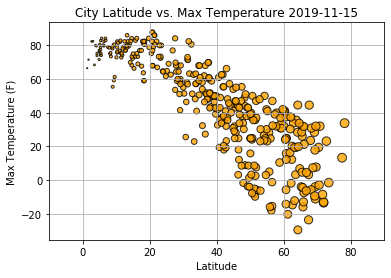

In [294]:
  

# List of x values 
x_axis = city_data['Lat']

# List y values
data = city_data['Max Temp']

plt.scatter(x=x_axis, y=data, marker="o", facecolors="orange", edgecolors="black", s=x_axis, alpha=0.8)
plt.title(f'City Latitude vs. Max Temperature {dt.date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlim(-10, 90)
#plt.ylim(-20,90)
plt.grid(True)

# Save the figure
plt.savefig("../Images/City_Lat_vs_MaxTemp.png")

plt.show()

#### Latitude vs. Humidity Plot

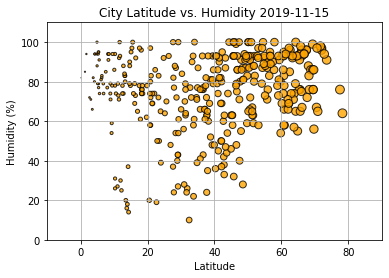

In [295]:
# List of x values 
x_axis = city_data['Lat']

# List y values
data = city_data['Humidity']

plt.scatter(x=x_axis, y=data, marker="o", facecolors="orange", edgecolors="black", s=x_axis, alpha=0.8)
plt.title(f'City Latitude vs. Humidity {dt.date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(-10,90)
plt.ylim(0,110)
plt.grid(True)

# Save the figure
plt.savefig("../Images/City_Lat_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

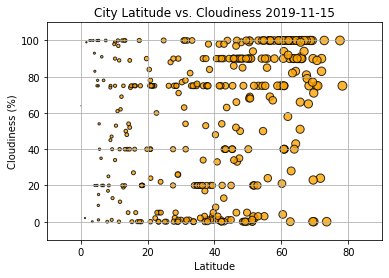

In [296]:
# List of x values 
x_axis = city_data['Lat']

# List y values
data = city_data['Cloudiness']
import datetime as dt     
date = dt.date.today


plt.scatter(x=x_axis, y=data, marker="o", facecolors="orange", edgecolors="black", s=x_axis, alpha=0.8)
plt.title(f'City Latitude vs. Cloudiness {dt.date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(-10,90)
plt.ylim(-10,110)
plt.grid(True)


# Save the figure
plt.savefig("../Images/City_Lat_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

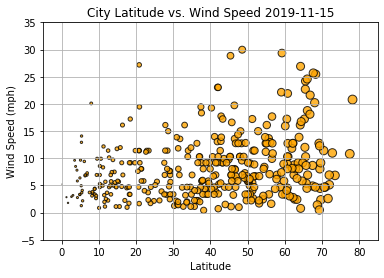

In [297]:
# List of x values 
x_axis = city_data['Lat']

# List y values
data = city_data['Wind Speed']

plt.scatter(x=x_axis, y=data, marker="o", facecolors="orange", edgecolors="black", s=x_axis, alpha=0.8)
plt.title(f'City Latitude vs. Wind Speed {dt.date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(-5,85)
plt.ylim(-5,35)
plt.grid(True)


# Save the figure
plt.savefig("../Images/City_Lat_vs_Windspeed.png")

plt.show()